# Data Preprocessing for ML - Test Python Model 2

This project demonstrates outliers detecting with three methods:
1. IQR(Interquartile Range Method)
2. KMeans Clustering
3. DBSCAN(Density-Based Spatial Clustering of Applications with Noise)

## Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from numpy import sqrt, random, array, argsort
from sklearn.preprocessing import scale
from scipy.stats import zscore

## Importing the dataset

In [2]:
# Importing the dataset
data = pd.read_csv("C:/Users/aleksandar.dimitrov/Desktop/Python Tests/Data/OutliersDetection.csv")
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
data.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


Removing the gender section

In [5]:
data_df = data.drop(columns=["Sex"], axis=1)
data_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
data_df.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


## Interquartile Range Method (IQM)

In [7]:
from collections import Counter

def detection(df, features):
    outlier_indices = []
    
    for column in features:
        # Calculate the first quartile (25th percentile)
        Q1 = np.percentile(df[column], 25)
        
        # Calculate the third quartile (75th percentile)
        Q3 = np.percentile(df[column], 75)
        
        # Calculate the interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Define the outlier step as 1.5 times the IQR
        outlier_step = 1.5 * IQR
        
        # Determine the lower and upper bounds for outliers
        lower_range = Q1 - outlier_step
        upper_range = Q3 + outlier_step
        
        # Detect outliers for the current column
        outliers = df[(df[column] < lower_range) | (df[column] > upper_range)].index
        
        # Store the indices of outliers
        outlier_indices.extend(outliers)
        
    # Count the occurrences of each outlier index
    outlier_counts = Counter(outlier_indices)
    
    # Find the indices with more than 2 occurrences (more than 2 outliers)
    multiple_outliers = [index for index, count in outlier_counts.items() if count > 2]
    
    return multiple_outliers


In [8]:
data_df.columns=["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Length          4177 non-null   float64
 1   Diameter        4177 non-null   float64
 2   Height          4177 non-null   float64
 3   Whole weight    4177 non-null   float64
 4   Shucked weight  4177 non-null   float64
 5   Viscera weight  4177 non-null   float64
 6   Shell weight    4177 non-null   float64
 7   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


In [9]:
outliers = detection(data_df, ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"])
data_df.loc[outliers]
  
                       

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
236,0.075,0.055,0.010,0.0020,0.0010,0.0005,0.0015,1
237,0.130,0.100,0.030,0.0130,0.0045,0.0030,0.0040,3
238,0.110,0.090,0.030,0.0080,0.0025,0.0020,0.0030,3
239,0.160,0.120,0.035,0.0210,0.0075,0.0045,0.0050,5
306,0.165,0.120,0.030,0.0215,0.0070,0.0050,0.0050,3
526,0.155,0.110,0.040,0.0155,0.0065,0.0030,0.0050,3
694,0.165,0.110,0.020,0.0190,0.0065,0.0025,0.0050,4
718,0.180,0.125,0.035,0.0265,0.0095,0.0055,0.0085,4
719,0.150,0.100,0.025,0.0150,0.0045,0.0040,0.0050,2
720,0.160,0.110,0.025,0.0180,0.0065,0.0055,0.0050,3


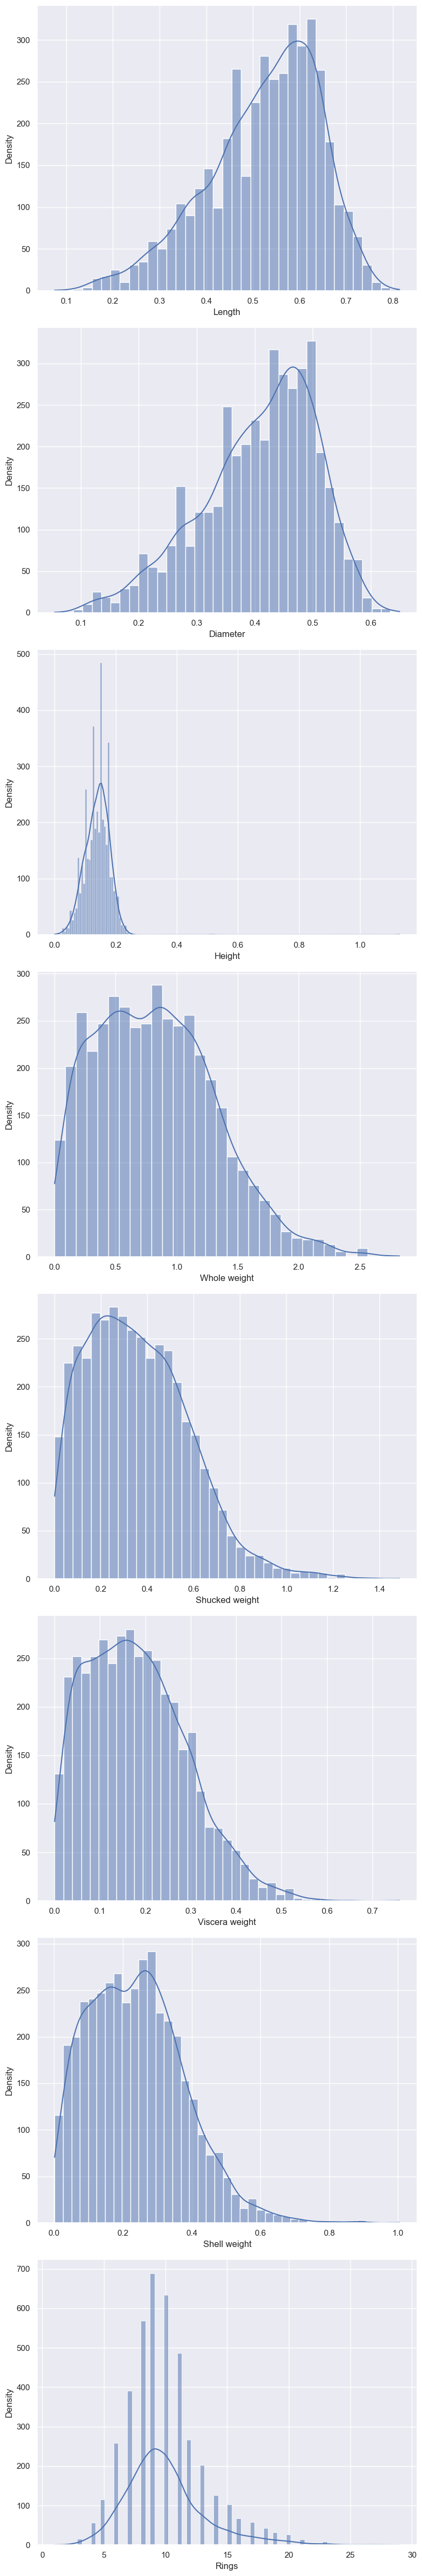

In [10]:
columns = ["Length", "Diameter", "Height", "Whole weight", "Shucked weight", "Viscera weight", "Shell weight", "Rings"]
fig, axes = plt.subplots(nrows=len(columns), figsize=(8, 6*len(columns)))
for i, column in enumerate(columns):
    ax = axes[i]
    sns.histplot(data_df[column], kde=True, ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel("Density")

plt.tight_layout()
plt.show()



## KMeans Clustering Method

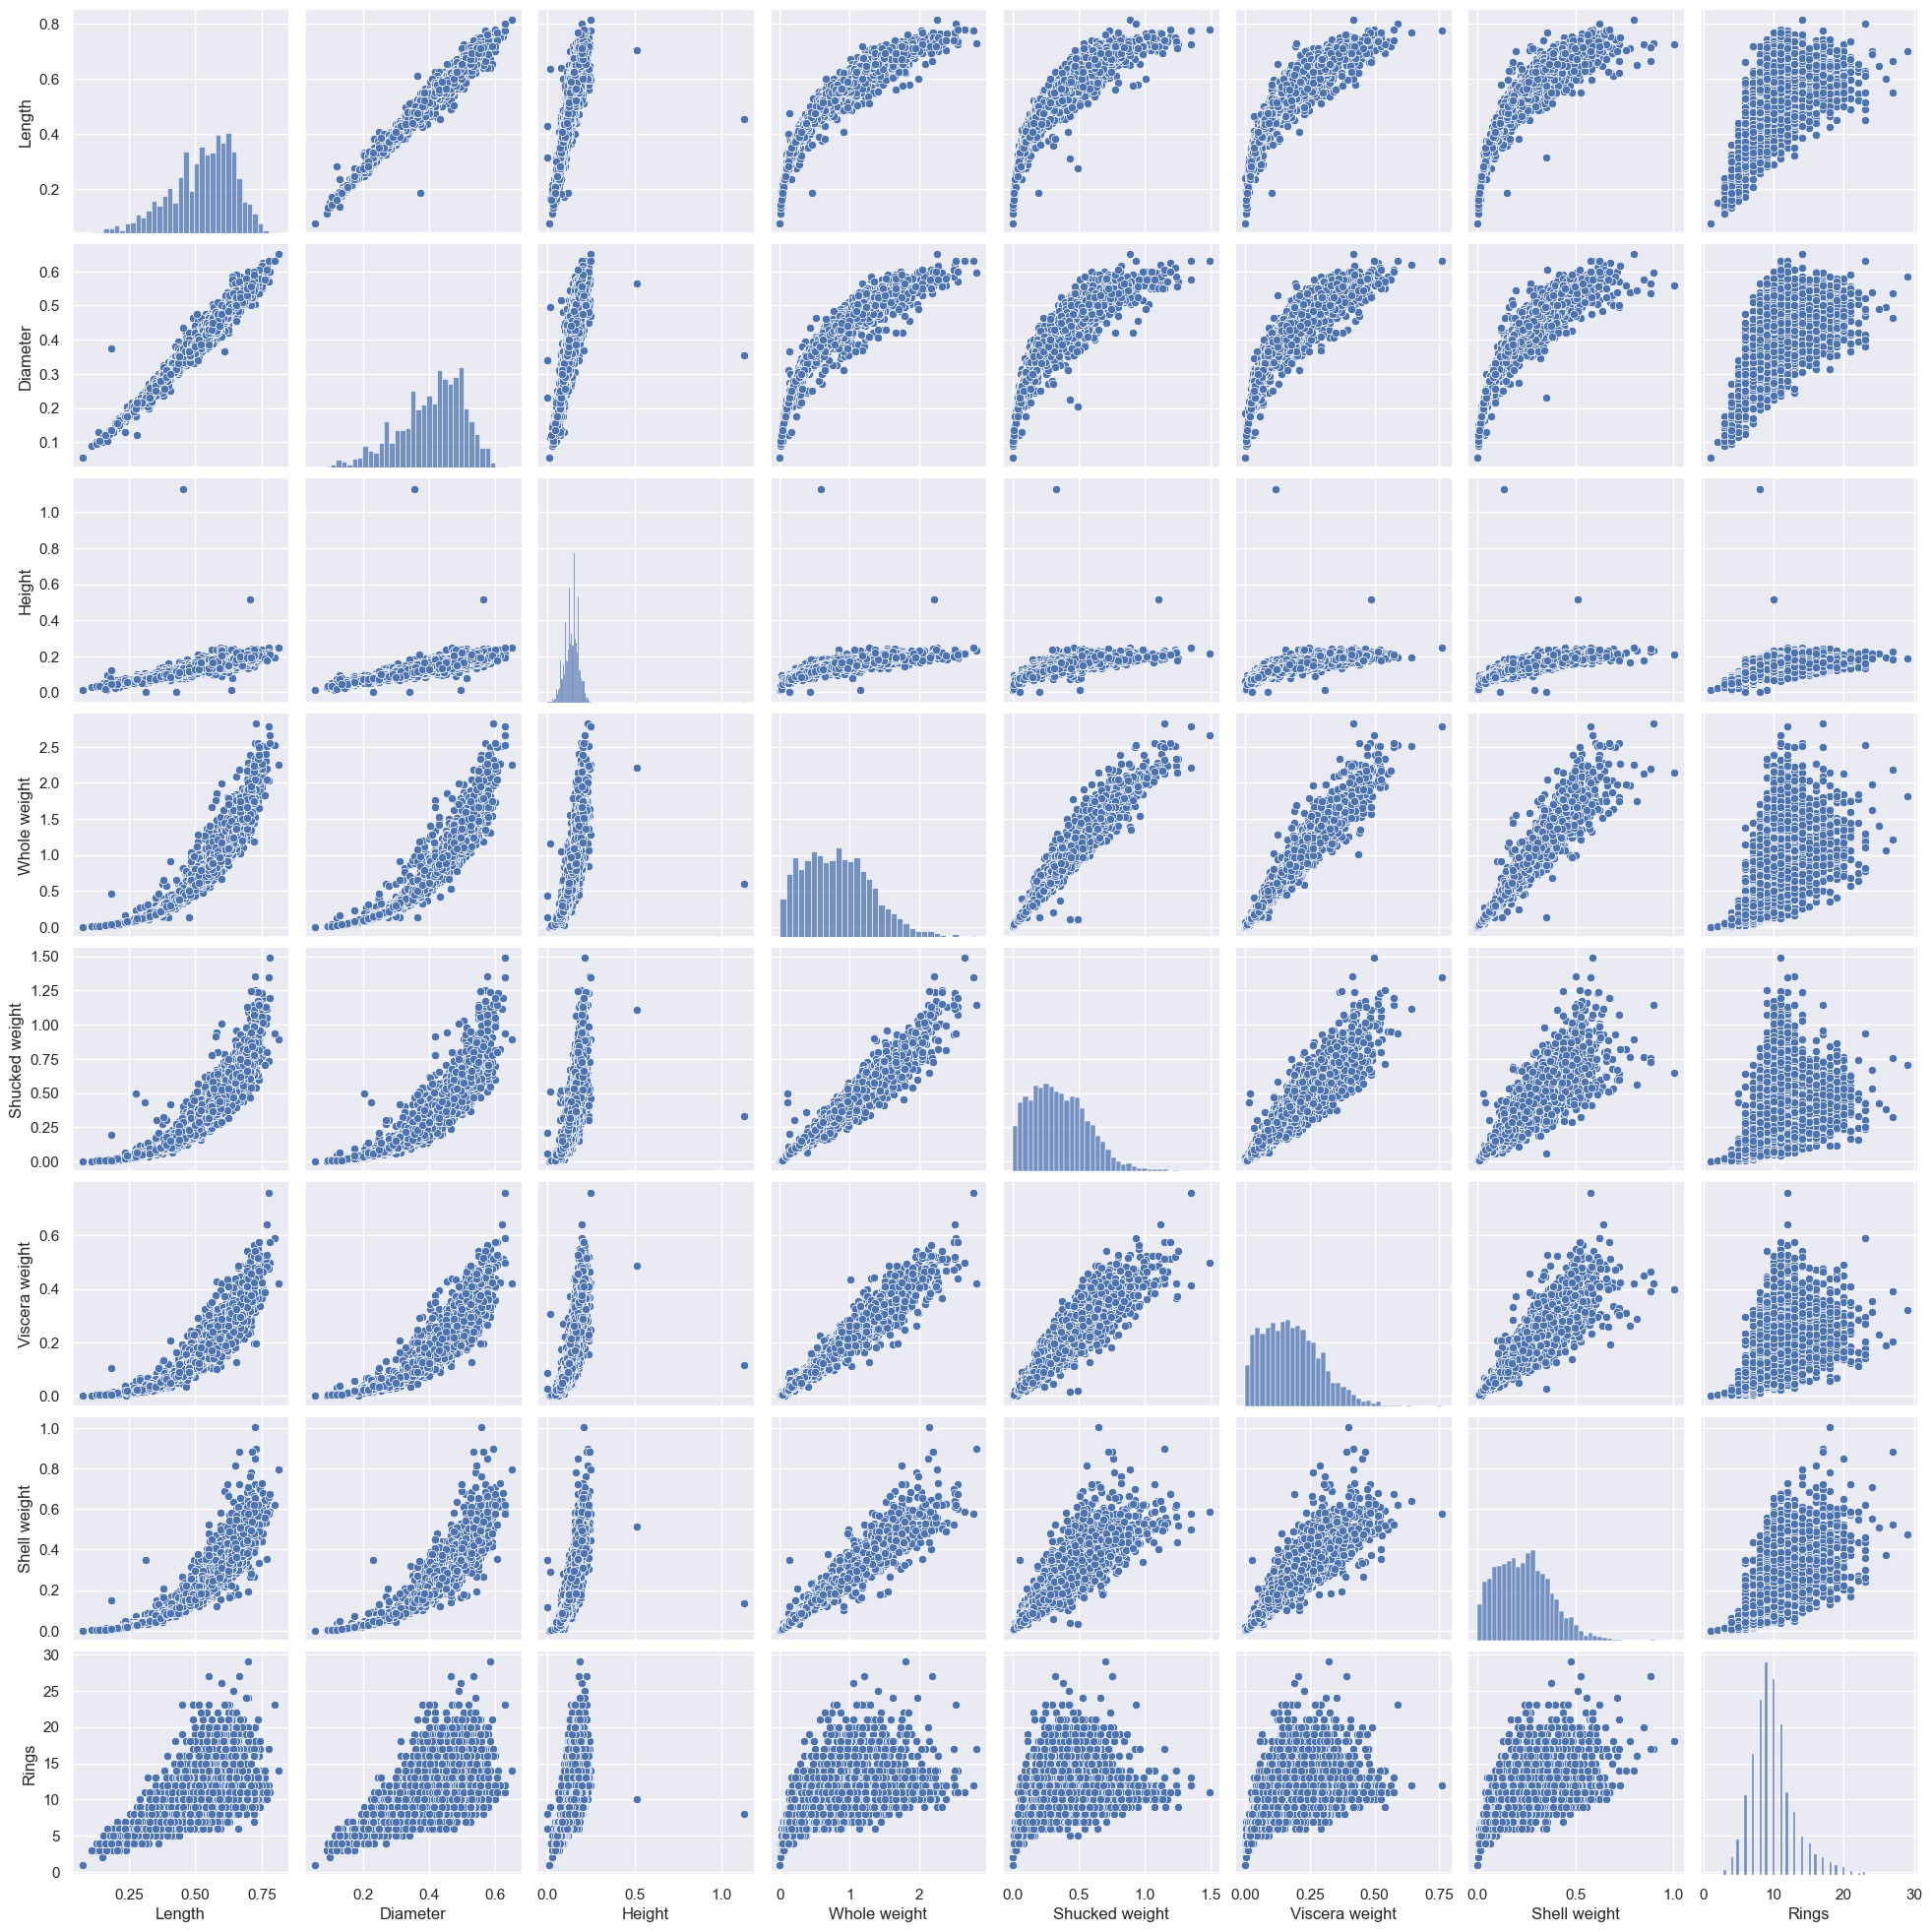

In [12]:
sns.pairplot(data_df)



In [17]:
scaled_preprocessing=preprocessing.scale(data_df)
scaled_preprocessing

array([[-0.57455813, -0.43214879, -1.06442415, ..., -0.72621157,
        -0.63821689,  1.57154357],
       [-1.44898585, -1.439929  , -1.18397831, ..., -1.20522124,
        -1.21298732, -0.91001299],
       [ 0.05003309,  0.12213032, -0.10799087, ..., -0.35668983,
        -0.20713907, -0.28962385],
       ...,
       [ 0.6329849 ,  0.67640943,  1.56576738, ...,  0.97541324,
         0.49695471, -0.28962385],
       [ 0.84118198,  0.77718745,  0.25067161, ...,  0.73362741,
         0.41073914,  0.02057072],
       [ 1.54905203,  1.48263359,  1.32665906, ...,  1.78744868,
         1.84048058,  0.64095986]])

In [20]:
scaled = data_df.apply(zscore)
scaled.head()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013


C:\Users\aleksandar.dimitrov\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aleksandar.dimitrov\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aleksandar.dimitrov\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\aleksandar.dimitrov\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


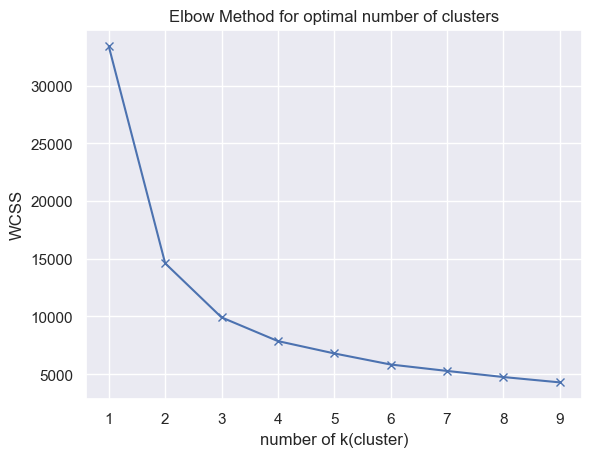

In [21]:
wcss=[] #liste oluştur
cluster_range=range(1,10)
for k  in cluster_range:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(scaled)
    wcss.append(kmeans.inertia_)
    
plt.plot(cluster_range,wcss,marker='x')
plt.xlabel("number of k(cluster)")
plt.ylabel("WCSS")
plt.title("Elbow Method for optimal number of clusters")
plt.show()

In [22]:
clusters_df = pd.DataFrame({'clusters':cluster_range,
                            'inertia': wcss})
clusters_df

,clusters,inertia
0,1,33416.000000
1,2,14612.656454
2,3,9922.845102
3,4,7867.964638
4,5,6799.274108
5,6,5837.694615
6,7,5282.041979
7,8,4752.506312
8,9,4289.904575


In [23]:
centroids = kmeans.cluster_centers_
centroids

array([[-2.18560693, -2.17382608, -1.8077745 , -1.49470041, -1.42645283,
        -1.45153804, -1.49956609, -1.4227836 ],
       [ 0.874343  ,  0.86794838,  0.71563647,  0.86939551,  0.89982091,
         0.88921899,  0.77123879,  0.17043581],
       [-1.13702176, -1.14521748, -1.01321385, -1.1184342 , -1.06604247,
        -1.10381851, -1.10369056, -0.75540964],
       [ 0.09507937,  0.13358237,  0.27168416, -0.02494554, -0.24411543,
        -0.05695281,  0.18576224,  1.62136269],
       [ 1.46961028,  1.45184986,  1.37766339,  2.06299983,  2.09775283,
         2.02937464,  1.86470725,  0.54673693],
       [-0.3379083 , -0.35144045, -0.36821411, -0.58013246, -0.54897007,
        -0.56175187, -0.5667075 , -0.28962385],
       [ 0.34597965,  0.34325063,  0.19052139,  0.11145136,  0.15899745,
         0.11144736,  0.08438112, -0.15873026],
       [ 0.94865354,  1.01984291,  1.15367287,  1.18149921,  0.73400973,
         0.99778997,  1.59014237,  2.35482818],
       [-0.57455813, -0.53292681

In [24]:
centroid_df = pd.DataFrame(centroids,columns = list(scaled.columns))
centroid_df

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,-2.185607,-2.173826,-1.807775,-1.494700,-1.426453,-1.451538,-1.499566,-1.422784
1,0.874343,0.867948,0.715636,0.869396,0.899821,0.889219,0.771239,0.170436
2,-1.137022,-1.145217,-1.013214,-1.118434,-1.066042,-1.103819,-1.103691,-0.755410
3,0.095079,0.133582,0.271684,-0.024946,-0.244115,-0.056953,0.185762,1.621363
4,1.469610,1.451850,1.377663,2.063000,2.097753,2.029375,1.864707,0.546737
5,-0.337908,-0.351440,-0.368214,-0.580132,-0.548970,-0.561752,-0.566708,-0.289624
6,0.345980,0.343251,0.190521,0.111451,0.158997,0.111447,0.084381,-0.158730
7,0.948654,1.019843,1.153673,1.181499,0.734010,0.997790,1.590142,2.354828
8,-0.574558,-0.532927,23.683287,-0.478743,-0.123312,-0.589352,-0.756763,-0.599818


In [25]:
clusters=scaled.copy()
clusters['cluster_pred']=kmeans.fit_predict(scaled)
scaled["labels"]=clusters['cluster_pred']
scaled

C:\Users\aleksandar.dimitrov\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,labels
0,-0.574558,-0.432149,-1.064424,-0.641898,-0.607685,-0.726212,-0.638217,1.571544,5
1,-1.448986,-1.439929,-1.183978,-1.230277,-1.170910,-1.205221,-1.212987,-0.910013,0
2,0.050033,0.122130,-0.107991,-0.309469,-0.463500,-0.356690,-0.207139,-0.289624,7
3,-0.699476,-0.432149,-0.347099,-0.637819,-0.648238,-0.607600,-0.602294,0.020571,7
4,-1.615544,-1.540707,-1.423087,-1.272086,-1.215968,-1.287337,-1.320757,-0.910013,0
...,...,...,...,...,...,...,...,...,...
4172,0.341509,0.424464,0.609334,0.118813,0.047908,0.532900,0.073062,0.330765,3
4173,0.549706,0.323686,-0.107991,0.279929,0.358808,0.309362,0.155685,0.020571,3
4174,0.632985,0.676409,1.565767,0.708212,0.748559,0.975413,0.496955,-0.289624,2
4175,0.841182,0.777187,0.250672,0.541998,0.773341,0.733627,0.410739,0.020571,2


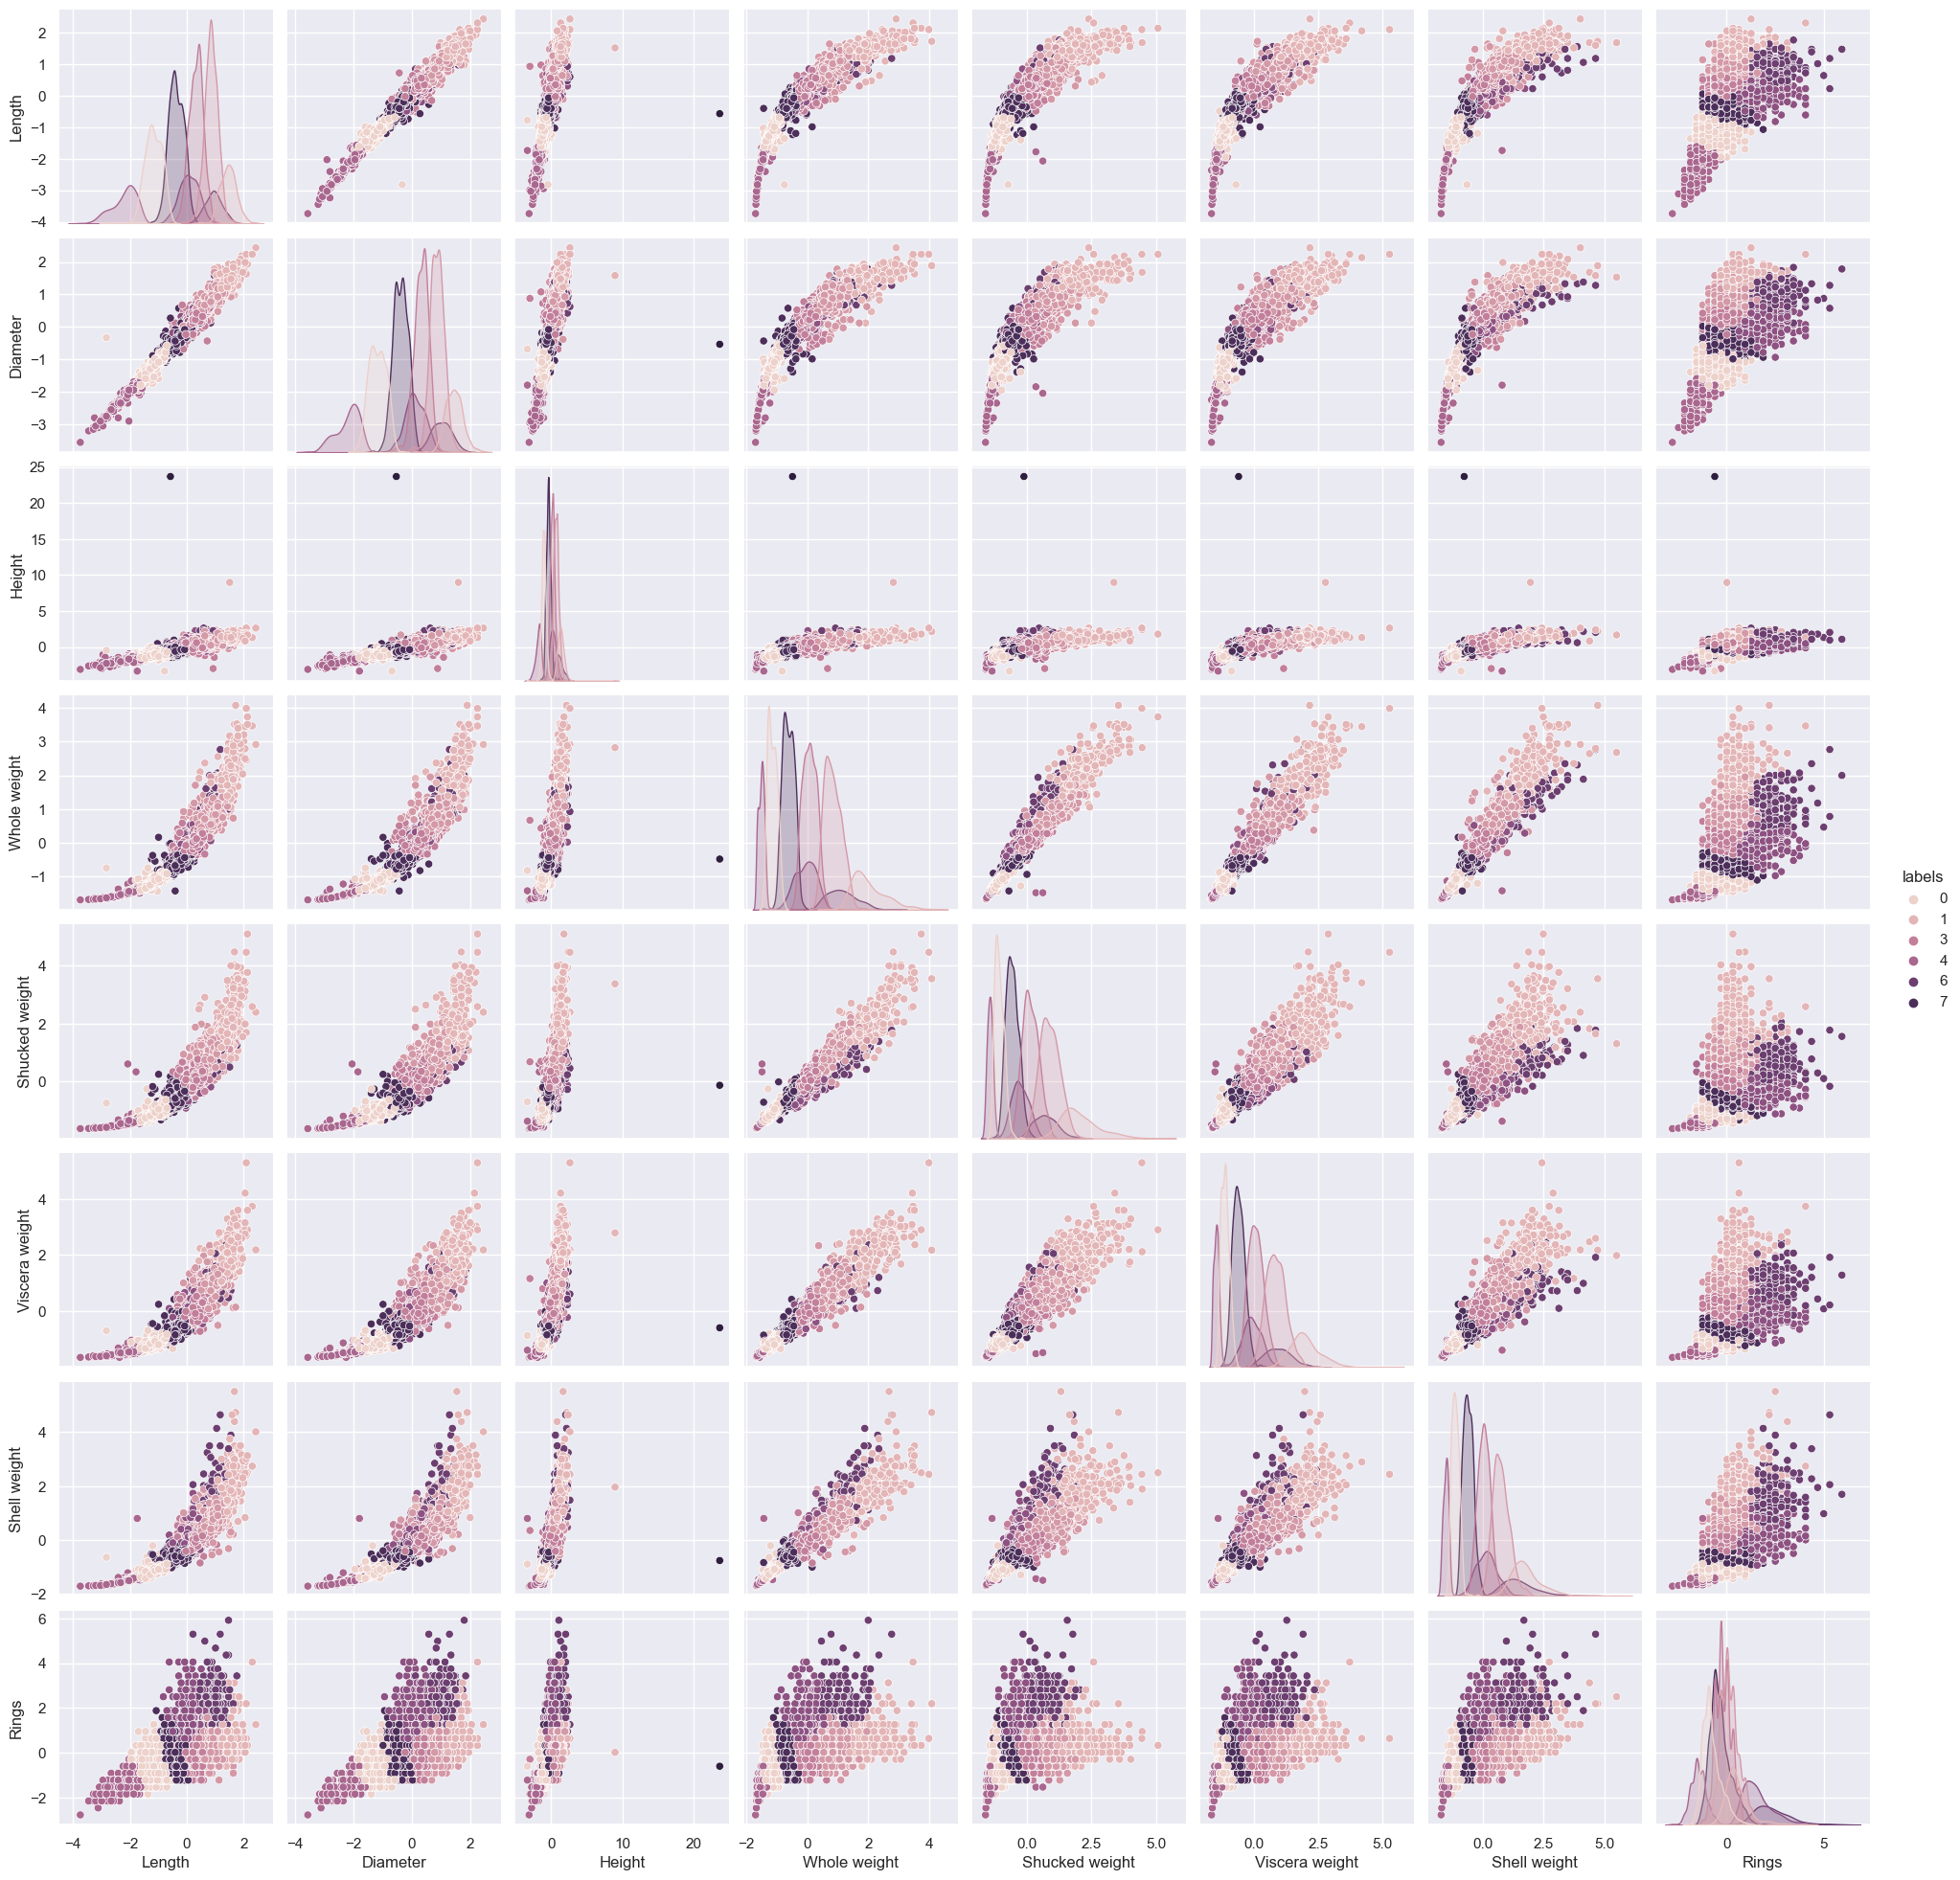

In [27]:
sns.pairplot(scaled,hue = 'labels')

C:\Users\aleksandar.dimitrov\AppData\Local\Temp\ipykernel_20424\1033313876.py:11: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ax.scatter(scaled.iloc[:, 0], scaled.iloc[:, 2], scaled.iloc[:, 3], c=labels.astype(np.float), edgecolor='k')


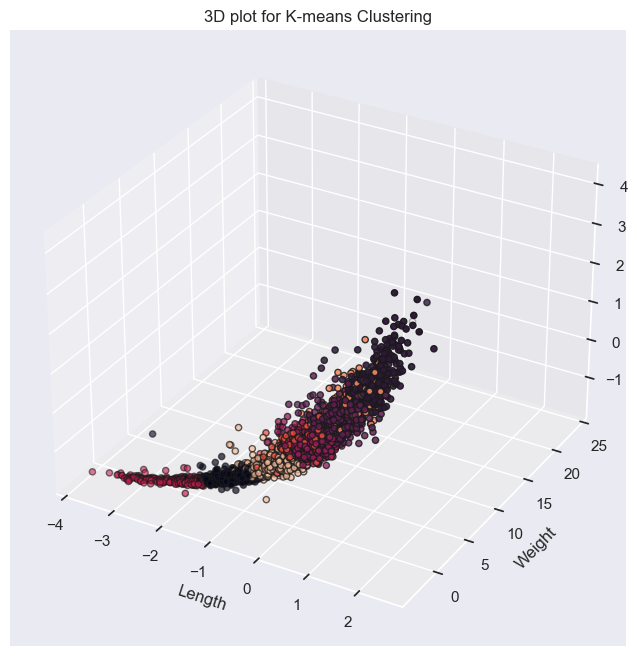

In [30]:
from mpl_toolkits.mplot3d import Axes3D

# Assuming you have performed K-means clustering and obtained labels
labels = kmeans.labels_

# Creating the 3D plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with three features (Length, Weight, Height)
ax.scatter(scaled.iloc[:, 0], scaled.iloc[:, 2], scaled.iloc[:, 3], c=labels.astype(np.float), edgecolor='k')

# Setting labels and title
ax.set_xlabel('Length')
ax.set_ylabel('Weight')
ax.set_zlabel('Height')
ax.set_title('3D plot for K-means Clustering')

# Displaying the plot
plt.show()
